# Week 5

## In Class Notes

In [2]:
def basic_pop_model(pop_init,growth_rate,N):
    pop_values = [pop_init]
    for i in range(1,N+1):
        new_pop = growth_rate*pop_values[-1]
        pop_values.append(new_pop)
    return pop_values

In [3]:
basic_pop_model(100,0.96,10)

[100,
 96.0,
 92.16,
 88.47359999999999,
 84.93465599999999,
 81.53726975999999,
 78.27577896959998,
 75.14474781081599,
 72.13895789838334,
 69.253399582448,
 66.48326359915008]

In [4]:
import matplotlib.pyplot as plt

In [5]:
def graph_pop_model(pop_init,growth_rate,N):
    xdata = [i for i in range(N+1)]
    ydata = basic_pop_model(pop_init,growth_rate,N)
    plt.plot(xdata,ydata)
    plt.title('Initial population={}, growth rate={}'.format(pop_init,growth_rate))
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.show()

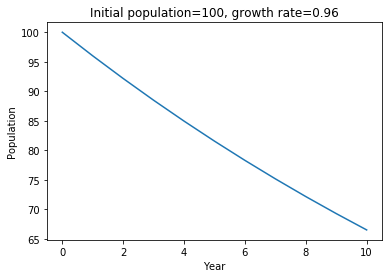

In [6]:
graph_pop_model(100,0.96,10)

In [7]:
def init_bifurcation(growth_rate, N):
    pop_values = []
    for pop_init in range(70,101):
        new_pop = basic_pop_model(pop_init,growth_rate,N)[-1]
        pop_values.append(new_pop)
    return pop_values

In [8]:
init_bifurcation(0.96,10)

[46.53828451940506,
 47.20311715539657,
 47.86794979138806,
 48.53278242737955,
 49.19761506337107,
 49.86244769936256,
 50.52728033535406,
 51.19211297134557,
 51.85694560733707,
 52.52177824332856,
 53.186610879320064,
 53.85144351531156,
 54.51627615130307,
 55.181108787294555,
 55.845941423286064,
 56.510774059277566,
 57.175606695269074,
 57.840439331260576,
 58.50527196725207,
 59.17010460324357,
 59.834937239235074,
 60.49976987522658,
 61.16460251121806,
 61.829435147209566,
 62.49426778320109,
 63.159100419192576,
 63.82393305518407,
 64.48876569117557,
 65.15359832716707,
 65.81843096315858,
 66.48326359915008]

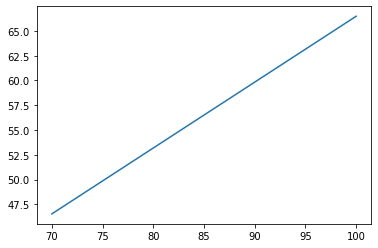

In [9]:
xdata = [i for i in range(70,101)]
ydata = init_bifurcation(0.96,10)
plt.plot(xdata,ydata)
plt.show()

In [10]:
def graph_multi_model(pop_init,growth_rates,N):
    xdata = [i for i in range(N+1)]
    graph_labels = []
    for growth_rate in growth_rates:
        ydata = basic_pop_model(pop_init,growth_rate,N)
        graph_labels.append('growth rate = {}'.format(growth_rate))
        plt.plot(xdata,ydata)
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.legend(graph_labels)
    plt.show()

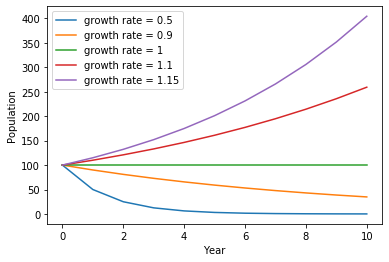

In [12]:
graph_multi_model(100,[0.5,0.9,1,1.1,1.15],10)